In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pyNN.nest as sim
from snntoolbox.simulation.plotting import plot_correlations

%matplotlib inline

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/mnt/2646BAF446BAC3B9/VirtualEnvironments/anaconda3/envs/python36/lib/python3.6/site-packages/pyNN/nest/__init__.py:55: UserWarning: Unable to install NEST extensions. Certain models may not be available.
Further details: DynamicModuleManagementError in Install: Module 'pynn_extensions' could not be opened.
The dynamic loader returned the following error: 'file not found'.

Please check LD_LIBRARY_PATH (OSX: DYLD_LIBRARY_PATH)!
  warnings.warn("Unable to install NEST extensions. Certain models may not be available.\nFurther details: {}".format(err))


In [2]:
path = '/mnt/2646BAF446BAC3B9/Data/snn_conversion/mnist/cnn/lenet5/keras/32bit/log/gui/nest/log_vars/0.npz'

data = np.load(path)

In [233]:
input_image_true = data['input_image_b_l'][0, 0]

In [234]:
input_b_l_t = data['input_b_l_t'][0, 0]

In [210]:
cellparams = {'v_thresh': 0.01,
              'v_reset': 0,
              'v_rest': 0,
              'i_offset': 0,
              'cm': 1,
              'tau_m': 1000,
              'tau_refrac': 0.001,
              'tau_syn_E': 0.01,
              'tau_syn_I': 0.01}
simparams = {'duration': 1000,
             'dt': 1}

sim.setup(simparams['dt'])

inp = sim.Population(np.size(input_image),
                     sim.IF_curr_exp(**cellparams), 
                     label='input')

for cell, amplitude in zip(inp, input_image_true.flatten()):
    cell.inject(sim.DCSource(
        start=0, stop=simparams['duration'], 
        amplitude=amplitude/1000))

inp.record(['v', 'spikes'])

inp.initialize(v=cellparams['v_rest'])

sim.run(simparams['duration'])
sim.reset()

shape = list(input_image.shape) + \
        [int(simparams['duration'] / simparams['dt'])]
spiketrains_flat = inp.get_data().segments[-1].spiketrains
spiketrains_flat2 = np.zeros((np.prod(shape[:-1]), shape[-1]))
for k, spiketrain in enumerate(spiketrains_flat):
    for t in spiketrain:
        spiketrains_flat2[k, int(t / simparams['dt'])] = t

input_b_l_t = np.reshape(spiketrains_flat2, shape)

In [211]:
input_image = np.mean(input_b_l_t, -1)

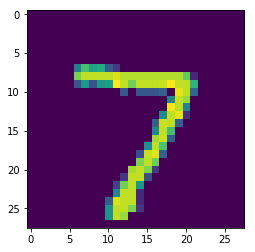

In [212]:
plt.imshow(input_image)


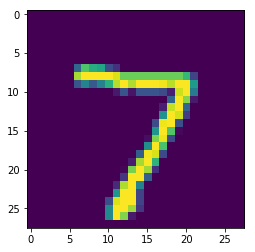

In [213]:
plt.imshow(input_image_true)

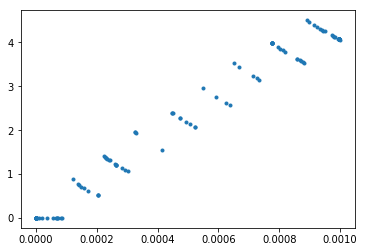

In [214]:
plt.plot(input_image_true.flatten(), input_image.flatten(), '.')

In [215]:
segments = inp.get_data().segments

Text(0,0.5,'Membrane potential (mV)')

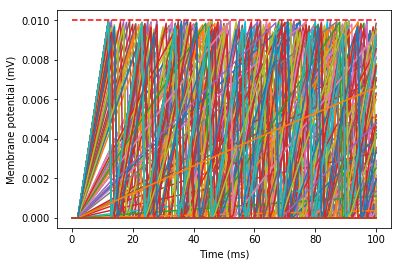

In [216]:
for segment in segments:
    vm = segment.analogsignals[0]
    plt.plot(vm.times, vm)
plt.plot(vm.times, np.ones_like(vm.times) * cellparams['v_thresh'], 'r--',
         label='V_thresh')
plt.xlabel("Time (%s)" % vm.times.units._dimensionality)
plt.ylabel("Membrane potential (%s)" % vm.units._dimensionality)

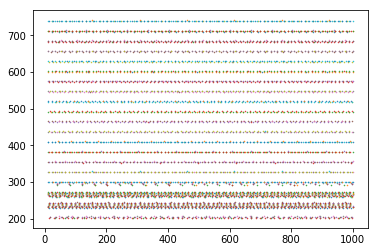

In [209]:
for num, spiketrain in enumerate(segments[0].spiketrains):
    y = np.ones_like(spiketrain) * num
    plt.plot(spiketrain, y, '.', markersize=1)

In [266]:
simparams = {'duration': 100,
             'dt': 0.1}

sim.setup(simparams['dt'])

inp = sim.Population(np.size(input_image),
                     sim.SpikeSourceArray(), 
                     label='input')

inp.set(spike_times=[np.linspace(
        0, simparams['duration'], 
        amplitude * simparams['duration']) 
    for amplitude in input_image_true.flatten()])

inp.record(['spikes'])

sim.run(simparams['duration'] - simparams['dt'])
sim.reset()

shape = list(input_image.shape) + \
        [int(simparams['duration'] / simparams['dt'])]
spiketrains_flat = inp.get_data().segments[-1].spiketrains
spiketrains_flat2 = np.zeros((np.prod(shape[:-1]), shape[-1]))
for k, spiketrain in enumerate(spiketrains_flat):
    for t in spiketrain:
        spiketrains_flat2[k, int(t / simparams['dt'])] = t

input_b_l_t = np.reshape(spiketrains_flat2, shape)

/mnt/2646BAF446BAC3B9/VirtualEnvironments/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  del sys.path[0]


In [267]:
input_image = np.mean(input_b_l_t.astype(bool), -1)

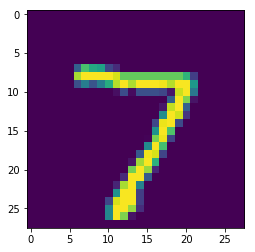

In [268]:
plt.imshow(input_image)

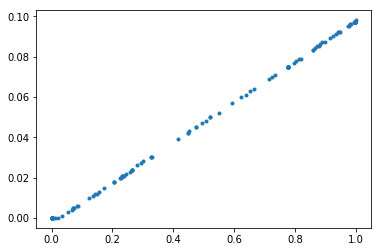

In [269]:
plt.plot(input_image_true.flatten(), input_image.flatten(), '.')

In [231]:
segments = inp.get_data().segments

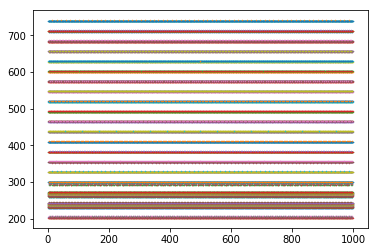

In [232]:
for num, spiketrain in enumerate(segments[0].spiketrains):
    y = np.ones_like(spiketrain) * num
    plt.plot(spiketrain, y, '.', markersize=1)